In [2]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special

import pandas as pd
import sys 



In [3]:
sep = 28.6 # 28.6, 44.7, 63.2, 104.9, 140.7
pdf_name1='CT14IC'# 'NNPDF40'#, 'CT14IC', 'CT10'
pdf_name2='NNPDF40'# 'NNPDF40'#, 'CT14IC', 'CT10'

IC=0

su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'
dati_lp1 = pd.read_csv(r'fit_parameters/stime_fr/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2 = pd.read_csv(r'fit_parameters/stime_fr/dati_lprot_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3 = pd.read_csv(r'fit_parameters/stime_fr/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

dati_lp1_or = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_1)+'_'+str(charm1)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp2_or = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_2)+'_'+str(charm2)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')
dati_lp3_or = pd.read_csv(r'fit_parameters/bands_/dati_lprot_su_charm_'+str(su2_3)+'_'+str(charm3)+'_scale_'+str(sep)+'_PDF_'+str(pdf_name1)+'_IC_'+str(IC)+'_def.csv')

In [4]:
#print(dati_lp1.to_latex())


In [5]:
y_lbl=50
x_lbl =50

ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti
title_s=35 #dimensione titolo bin
fit_l=2.  # dimensione linea fit

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


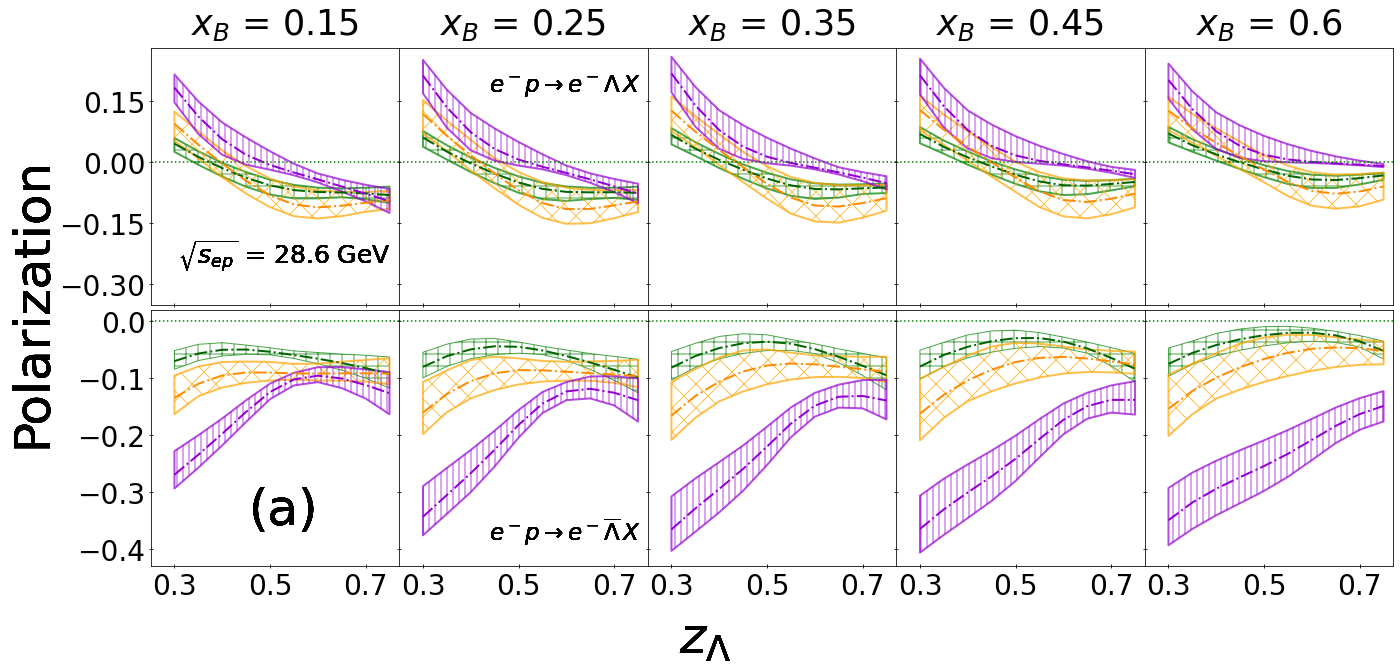

In [7]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.17,0.26]
lim1=[-0.35,0.28]
lim2=[-0.43,0.02]
limx=[0.25,0.77]
fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt1_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==310) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]
    dt12_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==300) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]

    dt2_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==310) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]
    dt22_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==300) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]

    dt3_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==310) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]
    dt32_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==300) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)
        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=7, axis='y')
        ax.locator_params(nbins=4, axis='x')
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=6, axis='y')
        #ax.locator_params(nbins=5, axis='x')
        #ax.set_xticklabels([0.35,0.45,0.55,0.65])
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.55, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or.pdf')
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or.png')


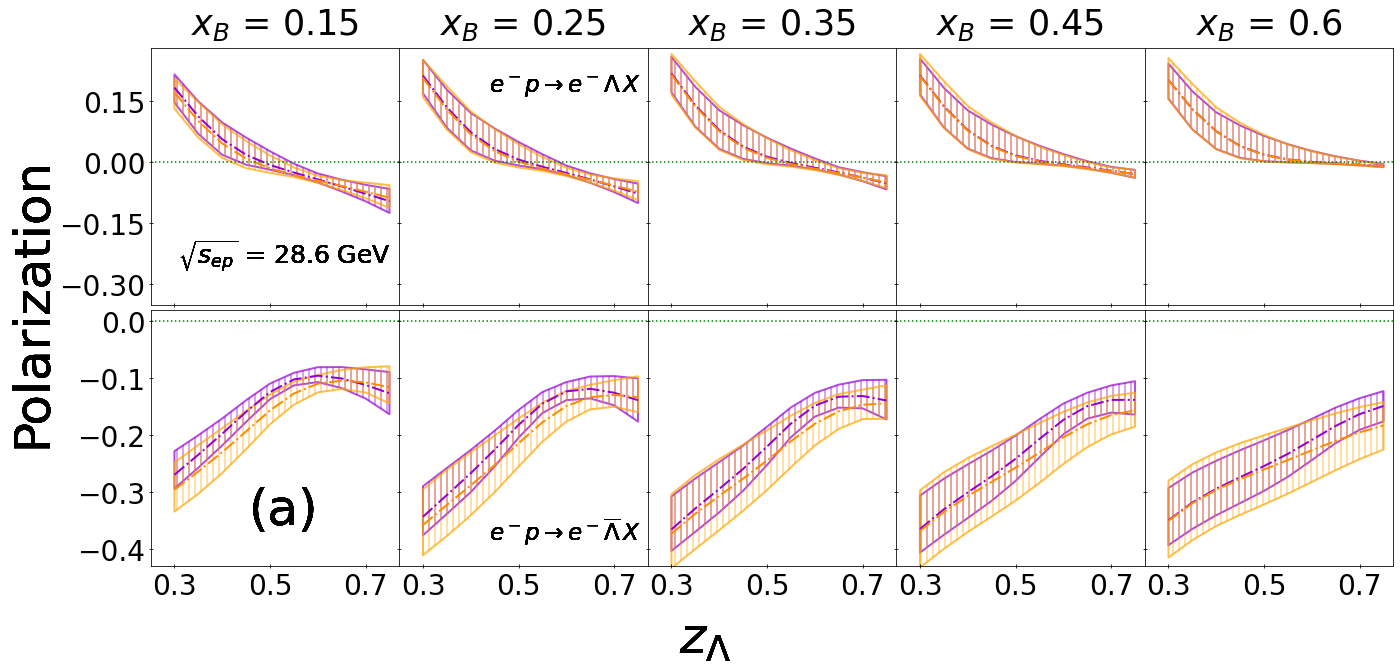

In [17]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.17,0.26]
lim1=[-0.35,0.28]
lim2=[-0.43,0.02]
limx=[0.25,0.77]
fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt1_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==310) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]
    dt12_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==300) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]

    dt2_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==310) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]
    dt22_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==300) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]

    dt3_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==310) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]
    dt32_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==300) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        #ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt32.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt32.maxx,dt32.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt32_or.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt32_or.maxx,dt32_or.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=7, axis='y')
        ax.locator_params(nbins=4, axis='x')
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        #ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt3.maxx,dt3.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt3_or.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt3_or.maxx,dt3_or.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=6, axis='y')
        #ax.locator_params(nbins=5, axis='x')
        #ax.set_xticklabels([0.35,0.45,0.55,0.65])
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.55, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or3.pdf')
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or3.png')


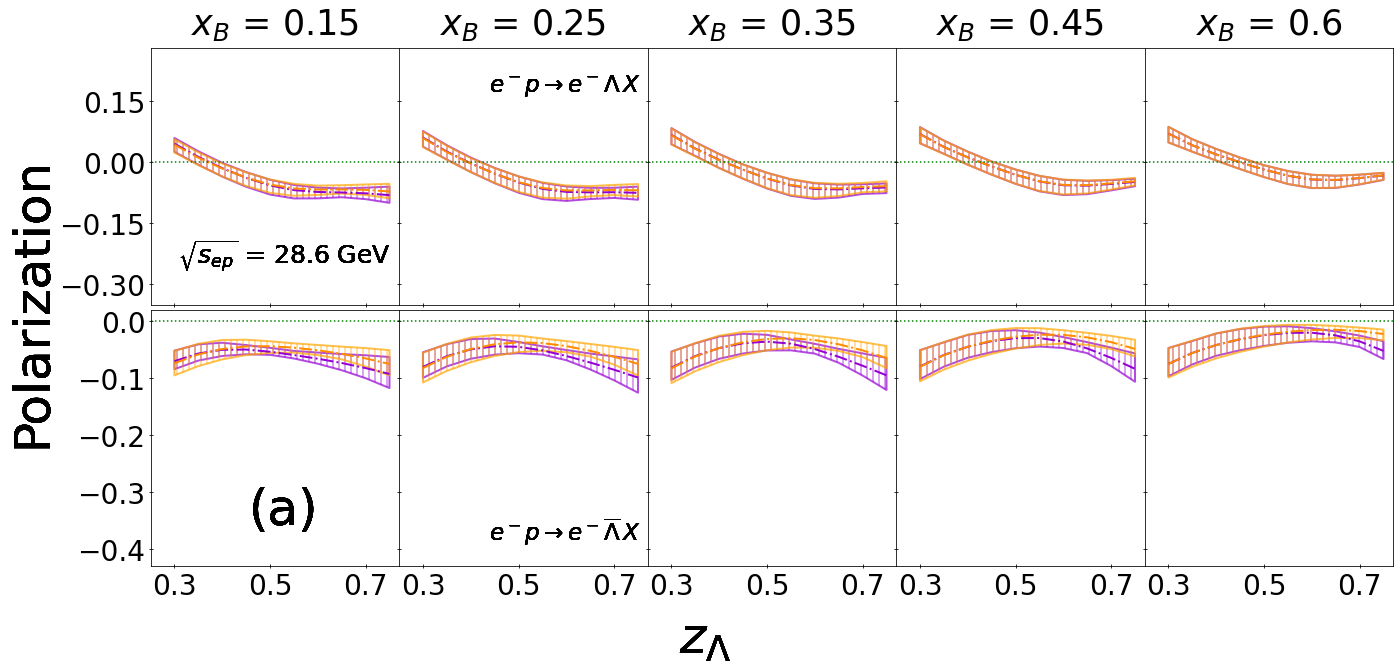

In [18]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.17,0.26]
lim1=[-0.35,0.28]
lim2=[-0.43,0.02]
limx=[0.25,0.77]
fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt1_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==310) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]
    dt12_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==300) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]

    dt2_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==310) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]
    dt22_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==300) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]

    dt3_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==310) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]
    dt32_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==300) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        #ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt12.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt12_or.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt12_or.maxx,dt12_or.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=7, axis='y')
        ax.locator_params(nbins=4, axis='x')
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        #ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt1_or.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt1_or.maxx,dt1_or.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=6, axis='y')
        #ax.locator_params(nbins=5, axis='x')
        #ax.set_xticklabels([0.35,0.45,0.55,0.65])
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.55, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or1.pdf')
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or1.png')


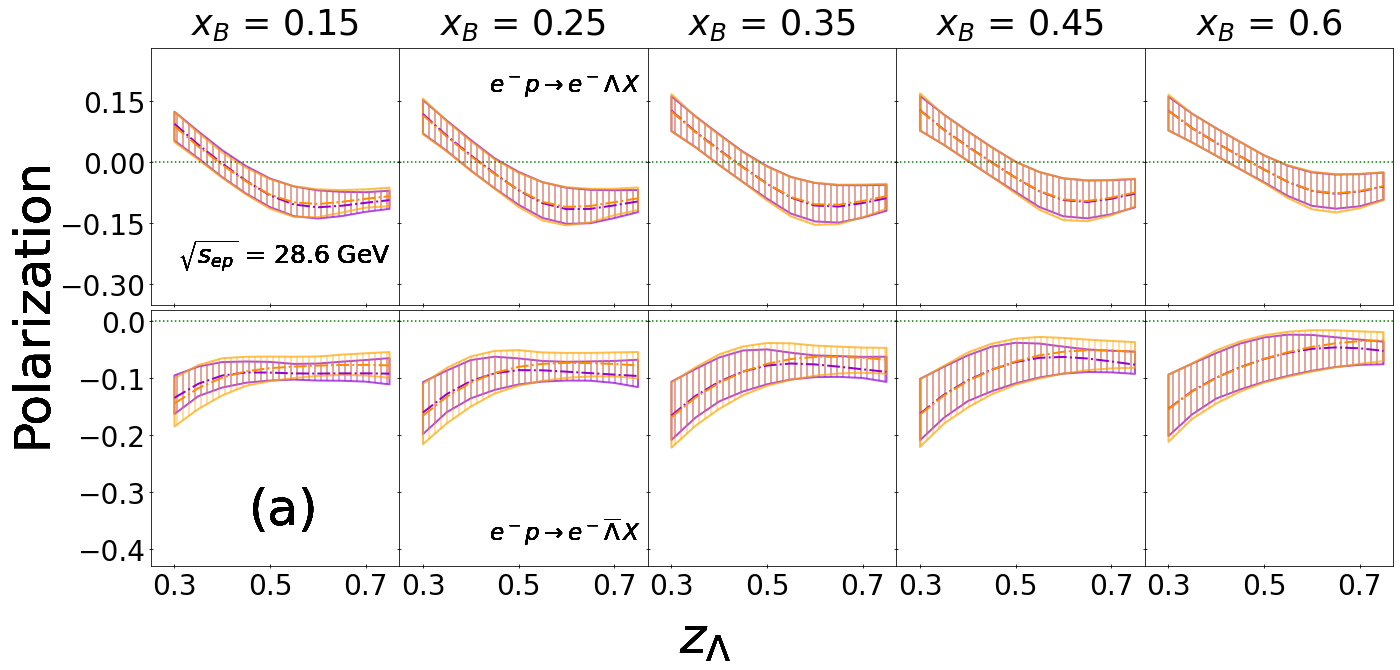

In [19]:
ct=1
xb=[0.15, 0.25, 0.35, 0.45, 0.6 , 0.15, 0.25, 0.35, 0.45, 0.6 ]
 
lim1=[-0.17,0.26]
lim1=[-0.35,0.28]
lim2=[-0.43,0.02]
limx=[0.25,0.77]
fig, axes = plt.subplots(1,10)
for xs,ax in zip(xb,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['hads1']==310) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['hads1']==300) & (dati_lp1['xb']==xs)& (dati_lp1['hads2']==100)]

    dt2 = dati_lp2.loc[(dati_lp2['hads1']==310) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['hads1']==300) & (dati_lp2['xb']==xs)& (dati_lp2['hads2']==100)]

    dt3 = dati_lp3.loc[(dati_lp3['hads1']==310) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['hads1']==300) & (dati_lp3['xb']==xs)& (dati_lp3['hads2']==100)]

    dt1_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==310) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]
    dt12_or = dati_lp1_or.loc[(dati_lp1_or['hads1']==300) & (dati_lp1_or['xb']==xs)& (dati_lp1_or['hads2']==100)]

    dt2_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==310) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]
    dt22_or = dati_lp2_or.loc[(dati_lp2_or['hads1']==300) & (dati_lp2_or['xb']==xs)& (dati_lp2_or['hads2']==100)]

    dt3_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==310) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]
    dt32_or = dati_lp3_or.loc[(dati_lp3_or['hads1']==300) & (dati_lp3_or['xb']==xs)& (dati_lp3_or['hads2']==100)]


    if ct<=5:
        ax=plt.subplot(2,5,ct)

    ### new fit lines
        #ax.plot(dt12.z1,dt12.conv,label='_(1)',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt12.z1,dt12.maxx,dt12.mins,label='(1)',linewidth=fit_l,color="none",hatch="+",edgecolor="green", alpha=0.7)

        #ax.plot(dt12.z1,dt22.conv,label='_(2)',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(2)',linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)

        ax.plot(dt12.z1,dt22.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt12.z1,dt22.maxx,dt22.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt12.z1,dt22_or.conv,label='_(3)',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt12.z1,dt22_or.maxx,dt22_or.mins,label='(3)',linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        title("$x_B$ = "+str(xs),fontsize=title_s,x=0.5, y=1.03)

        #if xs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1)
        #if xs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1)

    
        axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        ax.set_xticklabels([])
        #ax.set_yticks([-0.1,0.,0.1,0.2])
        if ct ==2 : ax.set_yticklabels([])
        if ct ==3 : ax.set_yticklabels([])
        if ct ==4 : ax.set_yticklabels([])
        if ct ==5 : ax.set_yticklabels([])            
        #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=25,frameon=False), 
        ax.set_ylim(lim1)
        ax.locator_params(nbins=7, axis='y')
        ax.locator_params(nbins=4, axis='x')
        plt.xticks(np.arange(0.3, 0.75+.25, .2))
        plt.yticks(np.arange(-0.3, 0.15+.15, .15))
            
    #xlabel("$z_{\pi}$",size=12)
    elif ct>5:
        ax=plt.subplot(2,5,ct)
        #ax.plot(dt1.z1,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkgreen')
        #ax.fill_between(dt1.z1,dt1.maxx,dt1.mins,color="none",hatch="+",edgecolor="green", alpha=0.7)
        #
        #ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        #ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="x",edgecolor="orange", alpha=0.7)
        #
        ax.plot(dt1.z1,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkviolet')
        ax.fill_between(dt1.z1,dt2.maxx,dt2.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="darkviolet", alpha=0.7)

        ax.plot(dt1.z1,dt2_or.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='darkorange')
        ax.fill_between(dt1.z1,dt2_or.maxx,dt2_or.mins,linewidth=fit_l,color="none",hatch="||",edgecolor="orange", alpha=0.7)

        axhline(linewidth=1.5, ls=':', color='g')
        ax.set_ylim(lim2)
        ax.locator_params(nbins=6, axis='y')
        #ax.locator_params(nbins=5, axis='x')
        #ax.set_xticklabels([0.35,0.45,0.55,0.65])
        plt.xticks(np.arange(0.3, 0.75+.25, .2))

        ax.tick_params(axis='both',direction='inout', which='major', labelsize=28)
        if ct >6: ax.set_yticklabels([])
    ax.set_xlim(limx)
    #if ct ==5 :legend(loc='upper right',bbox_to_anchor=(1.,1), fontsize=22,frameon=True), 
    #if ct ==10 :legend(loc='upper right',bbox_to_anchor=(1.,0.25), fontsize=22,frameon=True), 
    #if ct==1:ylabel('Polarization',size=y_lbl) 
    #ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\Lambda}$', ha='center',size=x_lbl)
    fig.text(0.2, 0.25, '(a)', ha='center',size=x_lbl)
    fig.text(0.02, 0.35, 'Polarization',rotation=90, ha='center',size=y_lbl)
    fig.text(0.2, 0.55, '$\sqrt{s_{ep}}$ = '+str(sep)+' GeV', ha='center',size=25)
    fig.text(0.4, 0.75, r'$e^-p \rightarrow e^-\Lambda\, X$', ha='center',size=23)
    fig.text(0.4, 0.23, r'$e^-p \rightarrow e^-\overline{\Lambda}\, X$', ha='center',size=23)

    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.02,wspace=0.0)
fig.set_size_inches(19.5, 12, forward=True)
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or2.pdf')
fig.savefig('fit_parameters/stime_fr/Lb_prot_'+str(sep)+'_bands2_or2.png')
